In [49]:
############################
#
#       DERIVATIVES
#
############################

import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

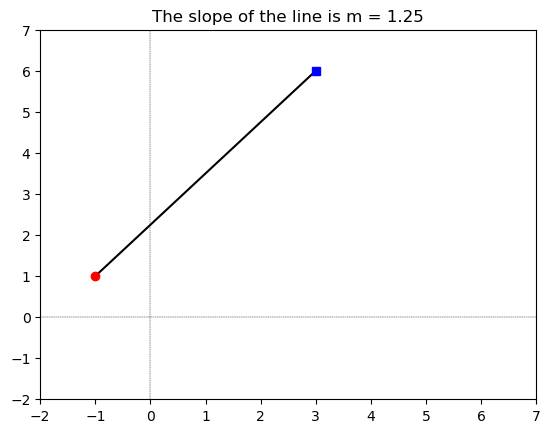

In [50]:
##### LOCAL vs. GLOBAL SLOPES ####

# The concept of a derivative is chopping up a line into smaller and smaller segments (the Limit as x coords distance goes to 0)


#### The Global Slope of a line ####

# Two xy coords for two points on a line
p1 = [ -1,1 ]
p2 = [ 3,6 ]

# Compute the slope for this line - distance between y coords over x coords of the points
m = (p2[1] - p1[1]) / (p2[0] - p1[0]) # delta y / delta x

# Note: draw/plot the line FIRST before placing the points so the points are on top of the line (and the line doesn't show as overlapping the points if drawn after)
plt.plot([p1[0],p2[0]],[p1[1],p2[1]], 'k') # draw line connecting the points
plt.plot(p1[0],p1[1],'ro',label='point 1')
plt.plot(p2[0],p2[1],'bs',label='point 2')

plt.title(f'The slope of the line is m = {m}')
plt.plot([0,0],[-2,7],'k--',linewidth=.3) # vertical line along x=0
plt.plot([-2,7],[0,0],'k--',linewidth=.3) # horizontal line along y=0
plt.xlim([-2,7])
plt.ylim([-2,7])
plt.show()

Global Slope: 4.0
Avg of Local Slopes: 4.0


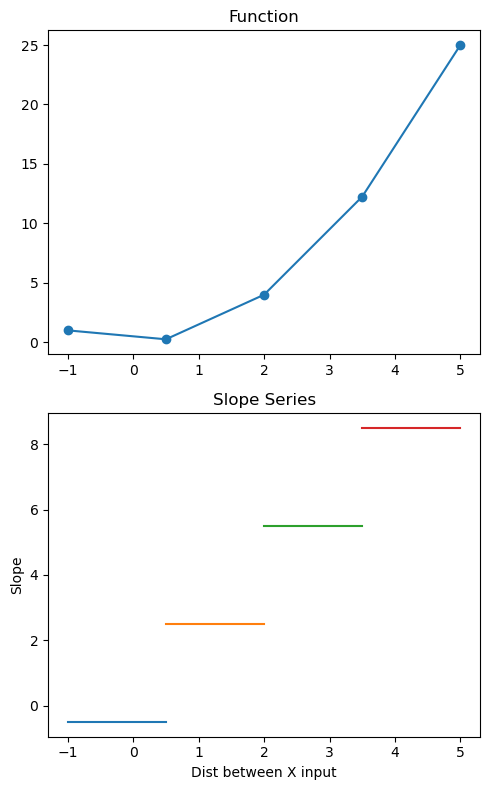

In [53]:
def plot_slopes(num_segments=5):
    x = np.linspace(-1,5,num_segments)
    y = x**2 # function to make a curved line out of segments

    _,axs = plt.subplots(2,1,figsize=(5,8)) # 2 rows, 1 col layout
    # plot the curved line
    axs[0].plot(x,y,'o-')
    axs[0].set_title('Function')

    ######################
    #    SLOPE SERIES
    ######################

    # initialize the slope variable to 0s
    m = np.zeros(num_segments-1) # line segments is one less than num points

    # plot the Slope Series - loop over the line segments
    for i in range(0,num_segments-1): # (segments is one less than number of points)
        m[i] = y[i+1] - y[i] # y coord distance for each line segment
        # to get the slope normalize the y distance by the x distance
        m[i] /= x[i+1] - x[i] # x distance for line segment

        xcoords = [ x[i],x[i+1] ] # horizontal line coords showing x points distance
        ycoords = [ m[i], m[i] ] # the y distance for the line segment (poisitions line vertically on it)
        axs[1].plot(xcoords,ycoords) # line showing the slope in the slope series


    globalSlope = (y[-1] - y[0]) / (x[-1] - x[0]) # first and last points
    avgLocalSlopes = np.mean(m) # compare with avg of all the local slopes
    print(f'Global Slope: {globalSlope}')
    print(f'Avg of Local Slopes: {avgLocalSlopes}')

    axs[1].set_title('Slope Series')
    axs[1].set_xlabel('Dist between X input')
    axs[1].set_ylabel('Slope')


    plt.tight_layout() # helps layout so title on bottom doesn't overlap with top plot
    plt.show()
    # the slope series plot visualizes the x coord distances at each segment against the slope of that segment


N = 5 # number of line segments - if this is set to infinity, the resulting slope series becomes the derivative

plot_slopes(N)


Global Slope: 24.0
Avg of Local Slopes: 4.0


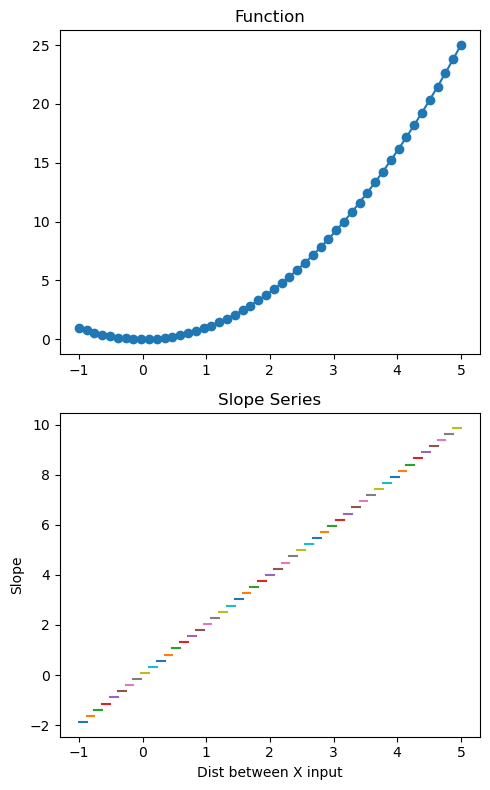

In [52]:
#### MORE LINE SEGMENTS (getting higher resolution slope series and closer to becoming the derivative)

N = 50

plot_slopes(N)

## Note how the global slope average (between first and last point) is the same as the local slopes average

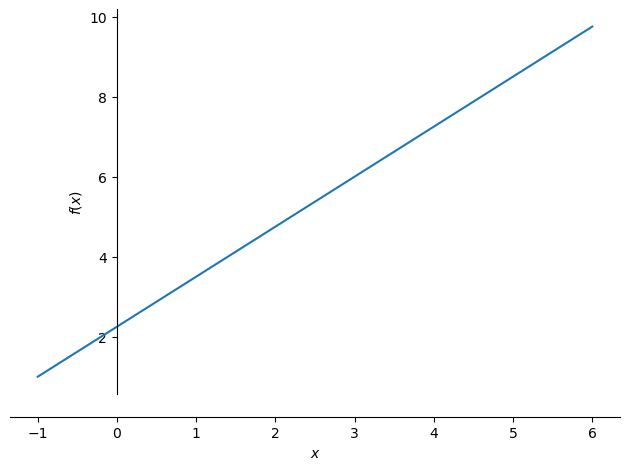

1.25000000000000

In [5]:
###################################
# Differentiation with Sympy
###################################

import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

x = sym.symbols('x')
fx = (5/4)*x + 9/4

sym.plot(fx,(x,-1,6), axis_center=[0,0]) # restrict x range to -1 to 6

# Compute the derivative with sympy using diff()
dydx = sym.diff(fx,x) # enter the function and which variable to compute diffentiation for
display(dydx)

2*x

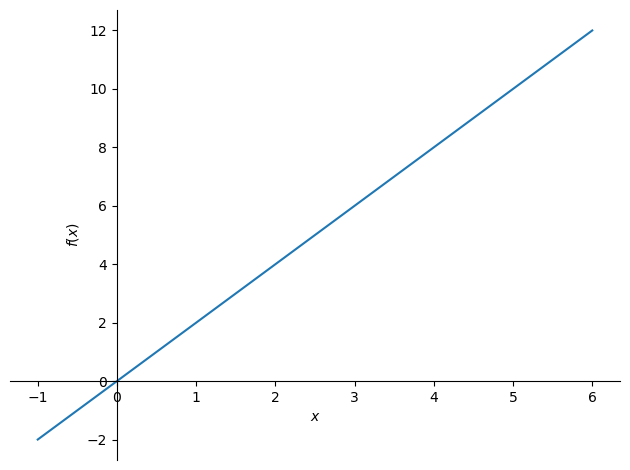

f'(-1) = -2
f'(0) = 0
f'(2) = 4


In [9]:
# Plotting the derivative

fx = x**2
fPrime = sym.diff(fx,x)
display(fPrime)

sym.plot(fPrime,(x,-1,6))
# the derivative 2x is a straight line with a slope of 2
# for each input x on the x-axis we can see what the derivative of the function is when x is that value on the y-axis

# ***The plot of the derivative shows us that for x^2, the slope gets more and more steep as x gets further away from zero


# Find derivatives at different x values:
somePoints = [-1,0,2]

for p in somePoints:
    dpdy = fPrime.subs(x,p) # substitute out the x values for a specific point (reruns the diff() with it)
    print(f"f'({p}) = {dpdy}")

# At f(-1), for example, there is a slope of -2 which means that the function does down 2 infinitesimals when it goes over 1 infinitesimal on the x-axis
  # see https://www.udemy.com/course/pycalc1_x/learn/lecture/33947394 at 13:00

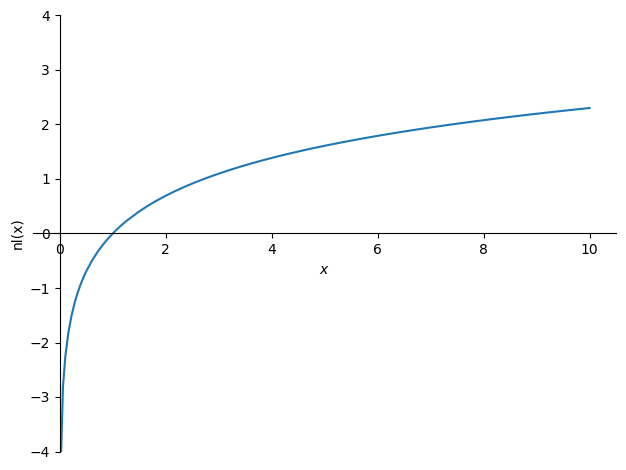

1/x

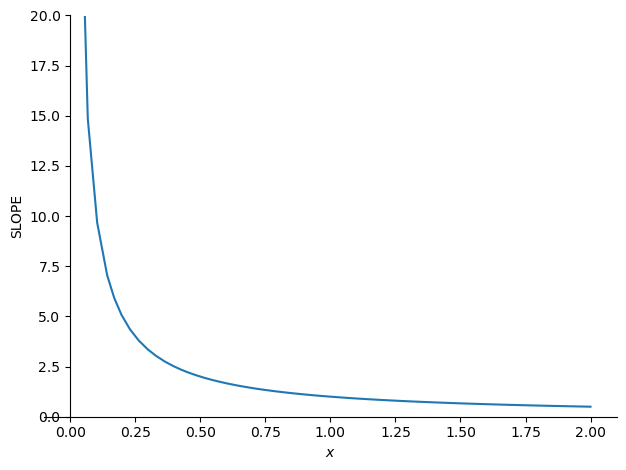

In [37]:
import sympy as sym

x = sym.symbols('x')

# fx = 4 * (5*x)
# sym.diff(fx,x)

# sym.plot(fx, (x,-10,10),ylim=[-20,100])

fx = sym.log(x)

p = sym.plot(fx,(x,-4,10),ylim=[-4,4],ylabel="nl(x)",show=False)
p.show()

fPrime = sym.diff(fx, x)
display(fPrime)
p = sym.plot(fPrime,(x,0,2), ylabel="SLOPE", ylim=[0,20], axis_center=(0,0), show=False)
p.show()